In [46]:
import pandas as pd


In [47]:
df=pd.read_csv("League of Legends Champion Stats 12.12.csv")

In [48]:
df

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,God,68.69,-0.68,48.87%,92.15%,7.49%,5.55%,1.95
1,Ahri,Mage,MID,God,73.09,-0.63,50.42%,94.37%,10.14%,7.85%,2.65
2,Akali,Assassin,MID,S,60.41,1.74,49.24%,69.81%,6.74%,11.72%,2.42
3,Akali,Assassin,TOP,C,40.98,-2.85,46.38%,29.18%,2.78%,11.72%,2.05
4,Akshan,Marksman,MID,A,49.07,2.17,50.64%,57.12%,2.85%,7.17%,2.24
...,...,...,...,...,...,...,...,...,...,...,...
232,Ziggs,Mage,ADC,D,33.05,-2.03,51.37%,56.10%,1.34%,0.32%,2.46
233,Zilean,Support,MID,A,53.11,0.42,52.72%,18.12%,0.87%,2.38%,3.56
234,Zilean,Support,SUPPORT,B,44.15,-5.03,48.37%,77.82%,3.31%,2.38%,3.10
235,Zoe,Mage,MID,B,47.52,-0.73,48.18%,91.45%,3.58%,1.71%,2.52


In [49]:
import matplotlib.pyplot as plt

In [50]:
import category_encoders as ce

In [51]:
encoder = ce.OrdinalEncoder(cols=['Tier'])

In [52]:
df=encoder.fit_transform(df)

In [53]:
df

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,1,68.69,-0.68,48.87%,92.15%,7.49%,5.55%,1.95
1,Ahri,Mage,MID,1,73.09,-0.63,50.42%,94.37%,10.14%,7.85%,2.65
2,Akali,Assassin,MID,2,60.41,1.74,49.24%,69.81%,6.74%,11.72%,2.42
3,Akali,Assassin,TOP,3,40.98,-2.85,46.38%,29.18%,2.78%,11.72%,2.05
4,Akshan,Marksman,MID,4,49.07,2.17,50.64%,57.12%,2.85%,7.17%,2.24
...,...,...,...,...,...,...,...,...,...,...,...
232,Ziggs,Mage,ADC,6,33.05,-2.03,51.37%,56.10%,1.34%,0.32%,2.46
233,Zilean,Support,MID,4,53.11,0.42,52.72%,18.12%,0.87%,2.38%,3.56
234,Zilean,Support,SUPPORT,5,44.15,-5.03,48.37%,77.82%,3.31%,2.38%,3.10
235,Zoe,Mage,MID,5,47.52,-0.73,48.18%,91.45%,3.58%,1.71%,2.52


In [54]:
df['Win %'] = df['Win %'].str.rstrip('%').astype('float') / 100.0

In [55]:
df

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,1,68.69,-0.68,0.4887,92.15%,7.49%,5.55%,1.95
1,Ahri,Mage,MID,1,73.09,-0.63,0.5042,94.37%,10.14%,7.85%,2.65
2,Akali,Assassin,MID,2,60.41,1.74,0.4924,69.81%,6.74%,11.72%,2.42
3,Akali,Assassin,TOP,3,40.98,-2.85,0.4638,29.18%,2.78%,11.72%,2.05
4,Akshan,Marksman,MID,4,49.07,2.17,0.5064,57.12%,2.85%,7.17%,2.24
...,...,...,...,...,...,...,...,...,...,...,...
232,Ziggs,Mage,ADC,6,33.05,-2.03,0.5137,56.10%,1.34%,0.32%,2.46
233,Zilean,Support,MID,4,53.11,0.42,0.5272,18.12%,0.87%,2.38%,3.56
234,Zilean,Support,SUPPORT,5,44.15,-5.03,0.4837,77.82%,3.31%,2.38%,3.10
235,Zoe,Mage,MID,5,47.52,-0.73,0.4818,91.45%,3.58%,1.71%,2.52


In [68]:
x = pd.DataFrame(df, columns = ["KDA"])
y = pd.DataFrame(df, columns = ['Win %'])

print(df["KDA"].min())
print(df["KDA"].max())
print(df["Win %"].min())
print(df["Win %"].max())

1.47
4.35
0.4368
0.5548


(1.47, 4.35)

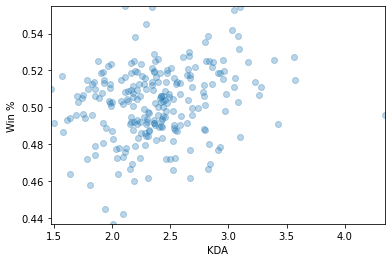

In [69]:
plt.scatter(x, y, alpha = 0.3)

plt.xlabel("KDA")
plt.ylabel("Win %")

plt.ylim(0.4368, 0.5548)
plt.xlim(1.47, 4.35)

In [70]:
import sklearn

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
reg = LinearRegression()

In [73]:
reg.fit(x, y)

LinearRegression()

In [74]:
reg.intercept_

array([0.47526498])

(1.47, 4.35)

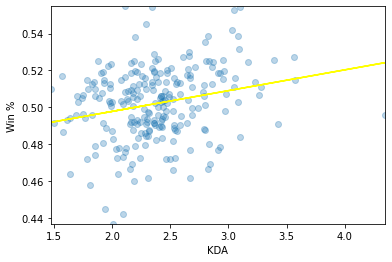

In [75]:
plt.scatter(x, y, alpha = 0.3)

plt.xlabel("KDA")
plt.ylabel("Win %")
plt.plot(x, reg.predict(x), color='yellow')
plt.ylim(0.4368, 0.5548)
plt.xlim(1.47, 4.35)